A. IQ test:

I) Antonym Test:
1. moral, ample
2. frugal, weak 

II) Logical reasoning
1.  3859 --- 1114 --- 25
    
    4978 --- 1315 --- 46
    
    7579 --- 1216 --- 37

2. 

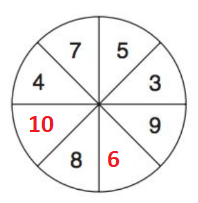


3.

4.

5.C

6. 8492

III)
1. C
2. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ITERATIONS = 1000

In [ ]:
def mean_squared_error(y_true, y_predicted):
    loss = np.sum((y_true-y_predicted)**2) / len(y_true)
    return loss
 
class GD:
  def __init__(self, x, y, lr = 10):
    # Initialize
    self.x = x
    self.y = y
    self.lr = lr

    self.current_weight = np.array([0.1, 0.1])
    self.current_bias = 0.01    
    self.n = float(len(x))
    self.y_predicted = None

  def forward(self):
    self.y_predicted = (self.current_weight[0] * (self.x**2)) + (self.current_weight[1] * self.x)  + self.current_bias
    return self.y_predicted, self.current_weight, self.current_bias

  def backward(self):
    # Calculating the gradients
    dW = np.array([0,0])
    dW[0] = -(2/self.n) * sum((self.x**2) * (self.y-self.y_predicted))
    dW[1] = -(2/self.n) * sum(self.x * (self.y-self.y_predicted))
  
    db = -(2/self.n) * sum(self.y-self.y_predicted)
      
    # Updating weights and bias
    self.current_weight = self.current_weight - (self.lr * dW)
    self.current_bias = self.current_bias - (self.lr * db)
  

class Model:
  def __init__(self, X, Y, iters = 1000, lr = 1e-3, stopping_threshold = 1e-6):
    self.x = X
    self.y = Y
    self.iters = iters
    self.stopping_threshold = stopping_threshold
    self.opt = GD(x = X, y = Y, lr = lr)

    self.losses = []
    self.last_weight = None
    self.best_weight = None
    self.last_bias = None
    self.best_bias = None
    self.best_iter = None
    
  def fit(self):
    # warmup
    y_predicted, self.last_weight, self.last_bias = self.opt.forward()
    current_loss = mean_squared_error(self.y, y_predicted)
    min_loss = current_loss
    self.best_weight = self.last_weight
    self.best_bias = self.last_bias
    previous_loss = current_loss
    self.opt.backward()

    #fitting
    for i in range(self.iters):
         
        y_predicted, self.last_weight, self.last_bias = self.opt.forward()
         
        current_loss = mean_squared_error(self.y, y_predicted)
 
        if abs(previous_loss-current_loss) <= self.stopping_threshold:
            break
        if current_loss < min_loss:
          min_loss = current_loss
          self.best_weight = self.last_weight
          self.best_bias = self.last_bias
          self.best_iter = i

        previous_loss = current_loss
 
        self.losses.append(current_loss)
        
        self.opt.backward()
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i} / {self.iters - 1}: \tloss: {current_loss}")
    print(f"Best iteration at {self.best_iter} with loss of {min_loss}")
  def visualization(self):
    plt.figure(figsize = (8,6))
    plt.plot(self.losses)
    plt.title("Cost")
    plt.ylabel("Cost")
    plt.show()

  def predict(self, x):
    return (self.best_weight[0] * (x**2)) + (self.best_weight[1] * x)  + self.best_bias
  def evaluate(self, x, y):
    y_pred = self.predict(x)
    loss = mean_squared_error(y, y_pred)
    print(f"Evaluate:\n\t + Size of data: {len(x)}\n\t + loss: {loss}")

Iteration 0 / 99999: 	loss: 1.471217817777778
Iteration 1 / 99999: 	loss: 0.7242187388604444
Iteration 2 / 99999: 	loss: 0.6521986631126816
Iteration 3 / 99999: 	loss: 0.6240015464889751
Iteration 4 / 99999: 	loss: 0.6157673252480117
Iteration 5 / 99999: 	loss: 0.6078591791681902
Iteration 6 / 99999: 	loss: 0.6002641956731302
Iteration 7 / 99999: 	loss: 0.5929699735244741
Iteration 8 / 99999: 	loss: 0.5859646025729051
Iteration 9 / 99999: 	loss: 0.5792366443110177
Iteration 10 / 99999: 	loss: 0.5727751131963016
Iteration 11 / 99999: 	loss: 0.566569458713728
Iteration 12 / 99999: 	loss: 0.5606095481486643
Iteration 13 / 99999: 	loss: 0.5548856500419771
Iteration 14 / 99999: 	loss: 0.5493884183003152
Iteration 15 / 99999: 	loss: 0.5441088769356223
Iteration 16 / 99999: 	loss: 0.5390384054089717
Iteration 17 / 99999: 	loss: 0.5341687245547765
Iteration 18 / 99999: 	loss: 0.5294918830624072
Iteration 19 / 99999: 	loss: 0.525000244493136
Iteration 20 / 99999: 	loss: 0.5206864748112077
Itera

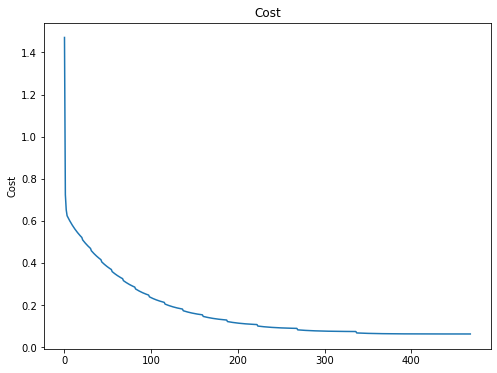

In [ ]:
X = np.array([[1], [2], [3]])
Y = np.array([[2], [4], [6]])

model = Model(X, Y, lr = 1e-2, iters = 100000)
model.fit()
model.visualization()

In [ ]:
model.predict(np.array([[1], [2], [3]]))

array([[1.99837457],
       [3.68837457],
       [6.29837457]])

In [ ]:
model.evaluate(np.array([[1],[2],[3]]), np.array([[2], [4], [6]]))

Evaluate:
	 + Size of data: 3
	 + loss: 0.062046811571149135
